In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

16.52% don't have connection


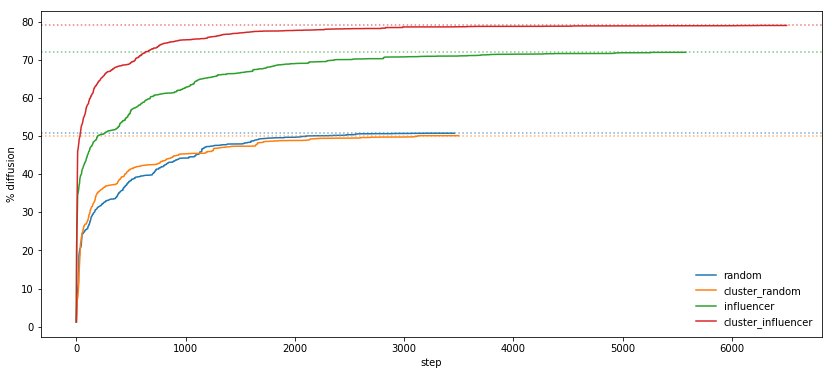

In [2]:
keys = ["random",  "cluster_random", "influencer","cluster_influencer"]

dataset = "politician"
df_emb = pd.read_csv("master/outputs/embeddings/%s_embedding.csv"%dataset)
df_edges = pd.read_csv("master/data/%s_edges.csv"%dataset, index_col="node_1")

plt.figure(figsize=(14, 6))
for i, key in enumerate(keys):
    fname = "outputs/%s_sum_%s.csv"%(dataset, key)
    denom = len(np.unique(df_edges.node_2)) 
    df_diffusion = pd.read_csv(fname)["0"]
    plt.plot(df_diffusion / denom * 100, label=key, color="C%i"%i)
    plt.axhline(df_diffusion[-1:].values[0] / denom * 100, color="C%i"%i, linestyle=":", alpha=0.6)
plt.legend(frameon=False, loc="lower right")
plt.xlabel("step")
plt.ylabel("% diffusion")
plt.savefig("outputs/summary_%s.png"%dataset)

print("%.2f%% don't have connection"%(100 * (1 - len(np.unique(df_edges.index)) / len(df_emb))))